Data Overview:
    Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  A

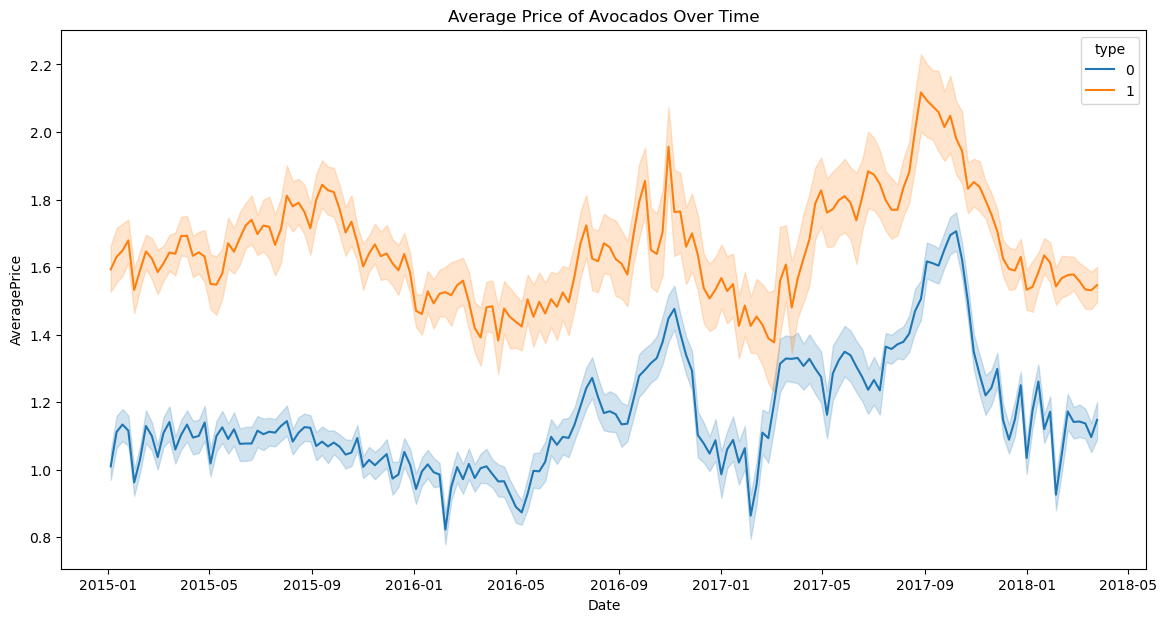


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.93      1820
           1       0.89      0.98      0.93      1830

    accuracy                           0.93      3650
   macro avg       0.93      0.93      0.93      3650
weighted avg       0.93      0.93      0.93      3650

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1820
           1       1.00      1.00      1.00      1830

    accuracy                           1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1820
           1       1.00      1.00      1.00      1830

    accuracy                           1.00      3650
   macr

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report

url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip?raw=true"
df = pd.read_csv(url, compression='zip')

print("Data Overview:\n", df.head())
print("\nData Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())

df['Date'] = pd.to_datetime(df['Date'])

label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['region'] = label_encoder.fit_transform(df['region'])

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='AveragePrice', hue='type')
plt.title('Average Price of Avocados Over Time')
plt.show()

X_classification = df.drop(columns=['Date', 'AveragePrice'])
y_classification = df['type']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

lr_classifier = LogisticRegression(max_iter=1000)
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

lr_classifier.fit(X_train_class, y_train_class)
dt_classifier.fit(X_train_class, y_train_class)
rf_classifier.fit(X_train_class, y_train_class)

y_pred_lr_class = lr_classifier.predict(X_test_class)
y_pred_dt_class = dt_classifier.predict(X_test_class)
y_pred_rf_class = rf_classifier.predict(X_test_class)

print("\nLogistic Regression Classification Report:\n", classification_report(y_test_class, y_pred_lr_class))
print("Decision Tree Classification Report:\n", classification_report(y_test_class, y_pred_dt_class))
print("Random Forest Classification Report:\n", classification_report(y_test_class, y_pred_rf_class))

X_regression = df.drop(columns=['Date', 'AveragePrice'])
y_regression = df['AveragePrice']

scaler = StandardScaler()
X_regression = scaler.fit_transform(X_regression)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

lr_regressor = LinearRegression()
dt_regressor = DecisionTreeRegressor(random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)

lr_regressor.fit(X_train_reg, y_train_reg)
dt_regressor.fit(X_train_reg, y_train_reg)
rf_regressor.fit(X_train_reg, y_train_reg)

y_pred_lr_reg = lr_regressor.predict(X_test_reg)
y_pred_dt_reg = dt_regressor.predict(X_test_reg)
y_pred_rf_reg = rf_regressor.predict(X_test_reg)

print("\nLinear Regression - MAE:", mean_absolute_error(y_test_reg, y_pred_lr_reg), ", MSE:", mean_squared_error(y_test_reg, y_pred_lr_reg))
print("Decision Tree - MAE:", mean_absolute_error(y_test_reg, y_pred_dt_reg), ", MSE:", mean_squared_error(y_test_reg, y_pred_dt_reg))
print("Random Forest - MAE:", mean_absolute_error(y_test_reg, y_pred_rf_reg), ", MSE:", mean_squared_error(y_test_reg, y_pred_rf_reg))

